In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import yfinance as yf

In [16]:
spy = yf.download("SPY", start="2015-01-23", auto_adjust=True)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


In [17]:
val_over_time = []
curr_shares = 0
curr_shares_over_time = []
opening_prices = list(spy["Open"])
for i in range(len(opening_prices)):
    if i % 10 == 0:
        curr_shares += 50/opening_prices[i]
    val_over_time.append(opening_prices[i]*curr_shares)
    curr_shares_over_time.append(curr_shares)

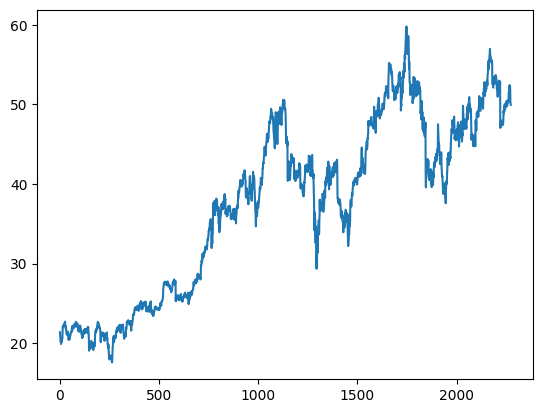

In [18]:
plt.plot([i for i in range(len(val_over_time))], np.array(val_over_time)/np.array(curr_shares_over_time))
plt.show()

In [8]:
stocks = ['MMM',
 'ABT',
 'ACN',
 'ADBE',
 'AMD',
 'A',
 'AKAM',
 'AMZN',
 'AAPL',
 'AZN',
 'BDX',
 'BMY',
 'CSCO',
 'CGNX',
 'CTSH',
 'DHR',
 'EMR',
 'GE',
 'GSK',
 'HON',
 'IBM',
 'INFY',
 'INTC',
 'JNJ',
 'JCI',
 'MRK',
 'MSFT',
 'NVDA',
 'NVS',
 'PFE',
 'PHG',
 'QGEN',
 'QCOM',
 'ROK',
 'STM',
 'CRM',
 'SNY',
 'TXN',
 'TMO',
 'TM',
 'VZ',
 'WIT',
 'AVGO',
 'TSLA',
 'META',
 'NOW',
 'WDAY',
 'ABBV',
 'BABA',
 'BOX']

In [ ]:
dfs = [yf.download(stock, start="2015-01-23", auto_adjust=True) for stock in stocks]

In [10]:
dfs_to_use = dfs
opening_prices_stocks = []
for df in dfs_to_use:
    opening_prices_stocks.append(list(df["Open"]))

val_over_time_stocks = []
curr_shares_over_time_stocks = []
for i in range(len(dfs_to_use)):
    val_over_time_stocks.append([])
    curr_shares_over_time_stocks.append([])
    
curr_shares_stocks = [0]*len(dfs_to_use)
for i in range(len(opening_prices_stocks[0])):
    if i % 10 == 0:
        for j in range(len(dfs_to_use)):
            curr_shares_stocks[j] += 1/opening_prices_stocks[j][i]
    for j in range(len(dfs_to_use)):
        val_over_time_stocks[j].append(opening_prices_stocks[j][i]*curr_shares_stocks[j])
        curr_shares_over_time_stocks[j].append(curr_shares_stocks[j])

In [19]:
curr_val_spy = [100]
real_vals_spy = np.array(val_over_time)/np.array(curr_shares_over_time)
for i in range(1, len(real_vals_spy)):
    curr_val_spy.append(curr_val_spy[-1]*real_vals_spy[i]/real_vals_spy[i-1])

In [12]:
curr_val_stock = [100]
real_vals_stock = np.sum(np.array(val_over_time_stocks)/np.array(curr_shares_over_time_stocks), axis=0)
for i in range(1, len(real_vals_stock)):
    curr_val_stock.append(curr_val_stock[-1]*real_vals_stock[i]/real_vals_stock[i-1])

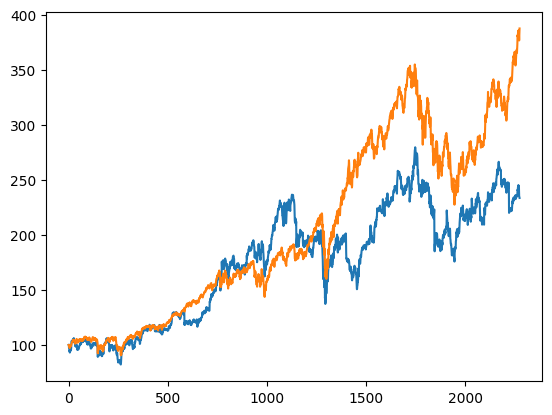

In [20]:
plt.plot([i for i in range(len(val_over_time))], curr_val_spy)
plt.plot([i for i in range(len(val_over_time))], curr_val_stock)
plt.show()